THIẾT LẬP VÀ CÀI ĐẶT THƯ VIỆN

In [ ]:
!pip install spacy torch torchtext
!python -m spacy download en_core_web_sm
!python -m spacy download fr_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 149.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 100.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!git clone --recursive https://github.com/multi30k/dataset.git multi30k-dataset

Cloning into 'multi30k-dataset'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 313 (delta 17), reused 21 (delta 16), pack-reused 281 (from 1)
Receiving objects: 100% (313/313), 18.21 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Submodule 'scripts/subword-nmt' (https://github.com/rsennrich/subword-nmt.git) registered for path 'scripts/subword-nmt'
Cloning into '/content/multi30k-dataset/scripts/subword-nmt'...
remote: Enumerating objects: 622, done.        
remote: Counting objects: 100% (46/46), done.        
remote: Compressing objects: 100% (30/30), done.        
remote: Total 622 (delta 25), reused 31 (delta 16), pack-reused 576 (from 1)        
Receiving objects: 100% (622/622), 261.27 KiB | 2.07 MiB/s, done.
Resolving deltas: 100% (374/374), done.
Submodule path 'scripts/subword-nmt': checked out '80b7c1449e2e26673fb0b5cae993fe2d0dc23846'


XỬ LÝ DỮ LIỆU CƠ BẢN

In [ ]:
import os
import gzip
import spacy

# ===============================
# 🧠 Tokenizers (English & French)
# ===============================
# Run once if missing:
# !python -m spacy download en_core_web_sm
# !python -m spacy download fr_core_news_sm

spacy_en = spacy.load("en_core_web_sm")
spacy_fr = spacy.load("fr_core_news_sm")

def en_tokenizer(text):
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]

def fr_tokenizer(text):
    return [tok.text.lower() for tok in spacy_fr.tokenizer(text)]


# ===============================
# 📂 Read dataset function (.gz)
# ===============================
def read_pairs(file_en, file_fr, data_dir='/content/multi30k-dataset/data/task1/raw', max_len=50):
    """
    Read .gz English–French files, filter long sentences,
    and return list of (en, fr) pairs.
    """
    path_en = os.path.join(data_dir, file_en)
    path_fr = os.path.join(data_dir, file_fr)
    data = []

    try:
        with gzip.open(path_en, 'rt', encoding='utf-8') as f_en, gzip.open(path_fr, 'rt', encoding='utf-8') as f_fr:
            for en_line, fr_line in zip(f_en, f_fr):
                en_clean = en_line.strip()
                fr_clean = fr_line.strip()

                if 0 < len(en_clean.split()) <= max_len and 0 < len(fr_clean.split()) <= max_len:
                    data.append((en_clean, fr_clean))

        print(f"✅ Loaded {len(data)} pairs from {file_en} & {file_fr}")
        return data

    except FileNotFoundError:
        print(f"❌ File not found: {path_en} or {path_fr}")
        return []
    except Exception as e:
        print(f"⚠️ Error loading: {e}")
        return []


# ===============================
# 🧩 Load Multi30K English–French data
# ===============================
DATA_DIR = '/content/multi30k-dataset/data/task1/raw'
MAX_SENTENCE_LEN = 50

train_data = read_pairs('train.en.gz', 'train.fr.gz', data_dir=DATA_DIR, max_len=MAX_SENTENCE_LEN)
val_data   = read_pairs('val.en.gz',   'val.fr.gz',   data_dir=DATA_DIR, max_len=MAX_SENTENCE_LEN)
test_data  = read_pairs('test_2017_flickr.en.gz', 'test_2017_flickr.fr.gz', data_dir=DATA_DIR, max_len=MAX_SENTENCE_LEN)

if not train_data:
    raise RuntimeError("❗Cannot load training data — check '/content/multi30k-dataset/data/task1/raw'.")


✅ Loaded 29000 pairs from train.en.gz & train.fr.gz
✅ Loaded 1014 pairs from val.en.gz & val.fr.gz
✅ Loaded 1000 pairs from test_2017_flickr.en.gz & test_2017_flickr.fr.gz


In [ ]:
print("\n--- Sample Data ---")
for i, (en_sentence, fr_sentence) in enumerate(train_data[:5]):
    print(f"Example {i+1}:")
    print(f"  EN: {en_sentence}")
    print(f"  FR: {fr_sentence}")


--- Sample Data ---
Example 1:
  EN: Two young, White males are outside near many bushes.
  FR: Deux jeunes hommes blancs sont dehors près de buissons.
Example 2:
  EN: Several men in hard hats are operating a giant pulley system.
  FR: Plusieurs hommes en casque font fonctionner un système de poulies géant.
Example 3:
  EN: A little girl climbing into a wooden playhouse.
  FR: Une petite fille grimpe dans une maisonnette en bois.
Example 4:
  EN: A man in a blue shirt is standing on a ladder cleaning a window.
  FR: Un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre.
Example 5:
  EN: Two men are at the stove preparing food.
  FR: Deux hommes aux fourneaux préparent à manger.


XÂY DỰNG TỪ VỰNG VÀ DATALOADER

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import Counter

# ===============================
# ⚙️ Config
# ===============================
special_tokens = ['<unk>', '<pad>', '<sos>', '<eos>']
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3
MAX_VOCAB_SIZE = 10000
BATCH_SIZE = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ===============================
# 🧱 Build Vocabulary (Manual Implementation)
# ===============================
class Vocabulary:
    def __init__(self, counter, max_size=None, min_freq=1, specials=None):
        self.itos = specials if specials else []
        self.stoi = {token: idx for idx, token in enumerate(self.itos)}

        # Sort by frequency (most common first)
        sorted_tokens = sorted(counter.items(), key=lambda x: x[1], reverse=True)

        for token, freq in sorted_tokens:
            if freq < min_freq:
                break
            if token not in self.stoi:
                if max_size and len(self.itos) >= max_size:
                    break
                self.stoi[token] = len(self.itos)
                self.itos.append(token)

        self.unk_idx = self.stoi.get('<unk>', 0)

    def __len__(self):
        return len(self.itos)

    def __getitem__(self, token):
        return self.stoi.get(token, self.unk_idx)

    def __call__(self, tokens):
        """Convert list of tokens to list of indices"""
        return [self[token] for token in tokens]

    def lookup_token(self, idx):
        """Convert index back to token"""
        if idx < len(self.itos):
            return self.itos[idx]
        return '<unk>'

    def set_default_index(self, idx):
        self.unk_idx = idx

def build_vocab_from_data(data, tokenizer, src_idx, max_size=None, min_freq=1, specials=None):
    """Build vocabulary from data"""
    counter = Counter()
    for pair in data:
        tokens = tokenizer(pair[src_idx])
        counter.update(tokens)

    return Vocabulary(counter, max_size=max_size, min_freq=min_freq, specials=specials)

# Build vocabularies
print("🔨 Building vocabularies...")
en_vocab = build_vocab_from_data(
    train_data,
    en_tokenizer,
    0,
    max_size=MAX_VOCAB_SIZE,
    min_freq=1,
    specials=special_tokens
)

fr_vocab = build_vocab_from_data(
    train_data,
    fr_tokenizer,
    1,
    max_size=MAX_VOCAB_SIZE,
    min_freq=1,
    specials=special_tokens
)

print(f"✅ Vocabulary sizes → EN: {len(en_vocab)} | FR: {len(fr_vocab)}")

# ===============================
# 🔢 Convert Sentences → Tensors
# ===============================
def data_process(data):
    data_index = []
    for en_sentence, fr_sentence in data:
        en_tensor = torch.tensor(en_vocab(en_tokenizer(en_sentence)), dtype=torch.long)
        fr_tensor = torch.tensor(
            [SOS_IDX] + fr_vocab(fr_tokenizer(fr_sentence)) + [EOS_IDX],
            dtype=torch.long
        )
        data_index.append((en_tensor, fr_tensor))
    return data_index

print("🔄 Processing data...")
train_data_indices = data_process(train_data)
val_data_indices   = data_process(val_data)
test_data_indices  = data_process(test_data)

# ===============================
# 📦 Custom Dataset & Collate
# ===============================
class TranslationDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

def collate_fn(batch):
    # Sort batch by descending English length (for packing)
    batch.sort(key=lambda x: len(x[0]), reverse=True)
    en_batch, fr_batch = zip(*batch)

    en_lengths = torch.tensor([len(seq) for seq in en_batch], dtype=torch.long)
    en_padded = pad_sequence(en_batch, padding_value=PAD_IDX, batch_first=True)
    fr_padded = pad_sequence(fr_batch, padding_value=PAD_IDX, batch_first=True)

    return en_padded.to(device), en_lengths.to(device), fr_padded.to(device)

# ===============================
# 🚀 Dataloaders
# ===============================
train_iterator = DataLoader(
    TranslationDataset(train_data_indices),
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=collate_fn
)

valid_iterator = DataLoader(
    TranslationDataset(val_data_indices),
    batch_size=BATCH_SIZE,
    collate_fn=collate_fn
)

test_iterator = DataLoader(
    TranslationDataset(test_data_indices),
    batch_size=1,
    collate_fn=collate_fn
)

print("✅ Dataloaders ready!")

🔨 Building vocabularies...
✅ Vocabulary sizes → EN: 10000 | FR: 10000
🔄 Processing data...
✅ Dataloaders ready!


ĐỊNH NGHĨA MÔ HÌNH

In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence
import random

# ===============================
# Encoder–Decoder Seq2Seq Model
# ===============================

class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_dim, emb_dim, padding_idx=PAD_IDX)
        self.rnn = nn.LSTM(
            emb_dim, hid_dim, n_layers, dropout=dropout, batch_first=True
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, src_len):
        # src: [batch_size, src_len]
        embedded = self.dropout(self.embedding(src))
        packed_embedded = pack_padded_sequence(
            embedded, src_len.cpu(), batch_first=True, enforce_sorted=True
        )
        _, (hidden, cell) = self.rnn(packed_embedded)
        # hidden, cell: [n_layers, batch_size, hid_dim]
        return hidden, cell


class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(output_dim, emb_dim, padding_idx=PAD_IDX)
        self.rnn = nn.LSTM(
            emb_dim, hid_dim, n_layers, dropout=dropout, batch_first=True
        )
        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):
        # input: [batch_size] → [batch_size, 1]
        input = input.unsqueeze(1)
        embedded = self.dropout(self.embedding(input))
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        output_1d = output.squeeze(1)
        prediction = self.fc_out(output_1d)
        return prediction, hidden, cell


class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        assert encoder.hid_dim == decoder.hid_dim
        assert encoder.n_layers == decoder.n_layers

    def forward(self, src, src_len, trg, teacher_forcing_ratio=0.5):
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = self.decoder.output_dim

        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device)
        hidden, cell = self.encoder(src, src_len)
        input = trg[:, 0]  # <sos>

        for t in range(1, trg_len):
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[:, t] = output
            top1 = output.argmax(1)
            teacher_force = random.random() < teacher_forcing_ratio
            input = trg[:, t] if teacher_force else top1

        return outputs


KHỞI TẠO MÔ HÌNH VÀ OPTIMIZER

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# ===============================
# Model Parameters
# ===============================
INPUT_DIM = len(en_vocab)
OUTPUT_DIM = len(fr_vocab)
EMB_DIM = 256
HID_DIM = 512
N_LAYERS = 2
DROPOUT = 0.5
TRG_PAD_IDX = PAD_IDX

# ===============================
# Initialize Model
# ===============================
enc = Encoder(INPUT_DIM, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT)
dec = Decoder(OUTPUT_DIM, EMB_DIM, HID_DIM, N_LAYERS, DROPOUT)
model = Seq2Seq(enc, dec, device).to(device)

def init_weights(m):
    """Initialize model weights."""
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)

model.apply(init_weights)
print("Model and weights initialized successfully.")

# ===============================
# Optimizer & Loss
# ===============================
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=TRG_PAD_IDX)
CLIP = 1.0  # Gradient clipping


Model and weights initialized successfully.


ĐỊNH NGHĨA HÀM HUẤN LUYỆN VÀ ĐÁNH GIÁ

In [ ]:
def train(model, iterator, optimizer, criterion, clip):
    """Huấn luyện mô hình trong một epoch."""
    model.train()
    epoch_loss = 0
    for i, (src, src_len, trg) in enumerate(tqdm(iterator, desc="Training")):
        optimizer.zero_grad()
        output = model(src, src_len, trg, teacher_forcing_ratio=0.5)

        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim)
        trg = trg[:, 1:].reshape(-1)

        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    """Đánh giá mô hình (Validation) với Teacher Forcing = 0."""
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, (src, src_len, trg) in enumerate(tqdm(iterator, desc="Evaluating")):
            output = model(src, src_len, trg, 0) # Teacher Forcing Ratio = 0

            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            trg = trg[:, 1:].reshape(-1)

            loss = criterion(output, trg)
            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

VÒNG LẶP HUẤN LUYỆN CHÍNH

In [ ]:
import os
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm.auto import tqdm


# Remove 'verbose' parameter - it's deprecated in newer PyTorch versions
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

N_EPOCHS = 50
best_valid_loss = float('inf')
train_losses, valid_losses = [], []
patience = 0

os.makedirs('checkpoints', exist_ok=True)
print("🚀 Training started")

for epoch in range(N_EPOCHS):
    teacher_forcing_ratio = max(0.5 * (0.95 ** epoch), 0.1)
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    # Get current learning rate for manual logging
    current_lr = optimizer.param_groups[0]['lr']

    # Step the scheduler
    old_lr = current_lr
    scheduler.step(valid_loss)
    new_lr = optimizer.param_groups[0]['lr']

    # Manually log if LR changed (replaces verbose=True)
    if new_lr != old_lr:
        print(f"📉 Learning rate reduced: {old_lr:.6f} → {new_lr:.6f}")

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'checkpoints/best_model.pth')
        patience = 0
        print(f"✅ Epoch {epoch+1:02}: New best model saved!")
    else:
        patience += 1

    print(f"Epoch {epoch+1:02} | Patience: {patience} | LR: {current_lr:.6f}")
    print(f"\tTrain Loss: {train_loss:.3f} | PPL: {np.exp(train_loss):7.3f}")
    print(f"\tValid Loss: {valid_loss:.3f} | PPL: {np.exp(valid_loss):7.3f}")

    if patience >= 5:
        print(f"⛔ Early stopping at Epoch {epoch+1}")
        break

model.load_state_dict(torch.load('checkpoints/best_model.pth'))
print("✅ Loaded best model.")

🚀 Training started


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 01: New best model saved!
Epoch 01 | Patience: 0 | LR: 0.001000
	Train Loss: 3.822 | PPL:  45.675
	Valid Loss: 3.583 | PPL:  35.969


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 02: New best model saved!
Epoch 02 | Patience: 0 | LR: 0.001000
	Train Loss: 2.940 | PPL:  18.907
	Valid Loss: 3.141 | PPL:  23.127


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 03: New best model saved!
Epoch 03 | Patience: 0 | LR: 0.001000
	Train Loss: 2.536 | PPL:  12.633
	Valid Loss: 3.053 | PPL:  21.180


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 04: New best model saved!
Epoch 04 | Patience: 0 | LR: 0.001000
	Train Loss: 2.230 | PPL:   9.302
	Valid Loss: 2.766 | PPL:  15.901


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 05: New best model saved!
Epoch 05 | Patience: 0 | LR: 0.001000
	Train Loss: 2.011 | PPL:   7.471
	Valid Loss: 2.603 | PPL:  13.504


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 06: New best model saved!
Epoch 06 | Patience: 0 | LR: 0.001000
	Train Loss: 1.826 | PPL:   6.208
	Valid Loss: 2.526 | PPL:  12.502


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 07 | Patience: 1 | LR: 0.001000
	Train Loss: 1.694 | PPL:   5.443
	Valid Loss: 2.527 | PPL:  12.522


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 08: New best model saved!
Epoch 08 | Patience: 0 | LR: 0.001000
	Train Loss: 1.579 | PPL:   4.849
	Valid Loss: 2.433 | PPL:  11.395


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 09 | Patience: 1 | LR: 0.001000
	Train Loss: 1.481 | PPL:   4.398
	Valid Loss: 2.477 | PPL:  11.905


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 10 | Patience: 2 | LR: 0.001000
	Train Loss: 1.396 | PPL:   4.039
	Valid Loss: 2.435 | PPL:  11.415


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 11: New best model saved!
Epoch 11 | Patience: 0 | LR: 0.001000
	Train Loss: 1.323 | PPL:   3.754
	Valid Loss: 2.412 | PPL:  11.153


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

✅ Epoch 12: New best model saved!
Epoch 12 | Patience: 0 | LR: 0.001000
	Train Loss: 1.272 | PPL:   3.569
	Valid Loss: 2.387 | PPL:  10.882


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 13 | Patience: 1 | LR: 0.001000
	Train Loss: 1.198 | PPL:   3.312
	Valid Loss: 2.421 | PPL:  11.256


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 14 | Patience: 2 | LR: 0.001000
	Train Loss: 1.164 | PPL:   3.202
	Valid Loss: 2.388 | PPL:  10.894


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

📉 Learning rate reduced: 0.001000 → 0.000500
Epoch 15 | Patience: 3 | LR: 0.001000
	Train Loss: 1.095 | PPL:   2.990
	Valid Loss: 2.446 | PPL:  11.540


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 16 | Patience: 4 | LR: 0.000500
	Train Loss: 0.987 | PPL:   2.684
	Valid Loss: 2.448 | PPL:  11.569


Training:   0%|          | 0/907 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 17 | Patience: 5 | LR: 0.000500
	Train Loss: 0.938 | PPL:   2.555
	Valid Loss: 2.473 | PPL:  11.852
⛔ Early stopping at Epoch 17
✅ Loaded best model.


HÀM DỊCH (INFERENCE) VÀ ĐÁNH GIÁ BLEU

In [ ]:
import torch
from tqdm.auto import tqdm
from nltk.translate.bleu_score import corpus_bleu
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# SETUP: Define special tokens and load best model
# ============================================================
print("="*50)
print("🔧 SETUP")
print("="*50)

# Define special token indices
SOS_IDX = fr_vocab['<sos>']
EOS_IDX = fr_vocab['<eos>']
special_tokens = ['<unk>', '<pad>', '<sos>', '<eos>']

print(f"SOS_IDX: {SOS_IDX}")
print(f"EOS_IDX: {EOS_IDX}")
print(f"EN vocab size: {len(en_vocab)}")
print(f"FR vocab size: {len(fr_vocab)}")

# Load the best model checkpoint with flexible loading
try:
    checkpoint = torch.load('checkpoints/best_model.pth', map_location=device)

    # Check what keys are in the checkpoint
    if isinstance(checkpoint, dict):
        print(f"\nCheckpoint keys: {list(checkpoint.keys())}")

    # Try different ways to load the model
    if isinstance(checkpoint, dict):
        if 'model_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            print(f"✅ Loaded model_state_dict from checkpoint")
        elif 'state_dict' in checkpoint:
            model.load_state_dict(checkpoint['state_dict'])
            print(f"✅ Loaded state_dict from checkpoint")
        elif 'model' in checkpoint:
            model.load_state_dict(checkpoint['model'])
            print(f"✅ Loaded model from checkpoint")
        else:
            # The checkpoint itself is the state dict
            model.load_state_dict(checkpoint)
            print(f"✅ Loaded checkpoint directly as state_dict")
    else:
        # If checkpoint is not a dict, it's the state_dict itself
        model.load_state_dict(checkpoint)
        print(f"✅ Loaded checkpoint directly")

    model.eval()
    if isinstance(checkpoint, dict):
        print(f"   Epoch: {checkpoint.get('epoch', 'N/A')}")
        print(f"   Validation loss: {checkpoint.get('valid_loss', checkpoint.get('val_loss', 'N/A'))}")
except FileNotFoundError:
    print("⚠️  Checkpoint file not found at 'checkpoints/best_model.pth'")
    print("   Using current model state")
    model.eval()
except Exception as e:
    print(f"⚠️  Error loading checkpoint: {e}")
    print("   Using current model state")
    model.eval()

# ============================================================
# TRANSLATION FUNCTION
# ============================================================
def translate(sentence, en_vocab, fr_vocab, en_tokenizer, model, device, max_len=50, debug=False):
    """Perform translation using Greedy Decoding."""
    model.eval()

    tokens = en_tokenizer(sentence)
    if debug:
        print(f"  Tokens: {tokens}")

    src_indexes = [en_vocab[token] for token in tokens]

    if not src_indexes:
        if debug:
            print("  Empty source indexes!")
        return ""

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    src_len = torch.LongTensor([len(src_indexes)]).to(device)

    with torch.no_grad():
        hidden, cell = model.encoder(src_tensor, src_len)

    input = torch.LongTensor([SOS_IDX]).to(device)
    trg_indexes = []

    for t in range(max_len):
        with torch.no_grad():
            output, hidden, cell = model.decoder(input, hidden, cell)

        pred_token = output.argmax(1).item()
        trg_indexes.append(pred_token)

        if pred_token == EOS_IDX:
            break

        input = torch.LongTensor([pred_token]).to(device)

    trg_tokens = [fr_vocab.lookup_token(i) for i in trg_indexes]

    if debug:
        print(f"  Target tokens: {trg_tokens}")

    # Remove special tokens
    translation = ' '.join([t for t in trg_tokens if t not in special_tokens])

    return translation

# ============================================================
# BLEU SCORE CALCULATION
# ============================================================
def calculate_bleu_score(test_data_indices, model, device):
    """Calculate BLEU Score on the entire test set."""
    trgs = []
    prds = []

    for src_tensor, trg_tensor in tqdm(test_data_indices, desc="Calculating BLEU"):
        # Convert tensor to English string
        src_sentence = [en_vocab.lookup_token(i.item()) for i in src_tensor]
        sentence_str = ' '.join([t for t in src_sentence if t not in special_tokens])
        predicted_str = translate(sentence_str, en_vocab, fr_vocab, en_tokenizer, model, device)
        predicted_tokens = predicted_str.split() if predicted_str else []

        # Ground Truth
        target_tokens = [fr_vocab.lookup_token(i.item()) for i in trg_tensor]
        clean_target = [t for t in target_tokens if t not in special_tokens]

        trgs.append([clean_target])
        prds.append(predicted_tokens)

    bleu_score = corpus_bleu(trgs, prds)
    return bleu_score
  # ============================================================
# EVALUATION
# ============================================================
print("\n" + "="*50)
print("📊 EVALUATION RESULTS")
print("="*50)

bleu_score = calculate_bleu_score(test_data_indices, model, device)
print(f"\n✅ BLEU Score on Test Set: {bleu_score*100:.2f}")

# ============================================================
# TRANSLATION EXAMPLES
# ============================================================
print("\n" + "="*50)
print("🌐 TRANSLATION EXAMPLES (with debug)")
print("="*50)

example_sentences = [
    "A man is eating spaghetti.",
    "A woman is playing with a dog.",
    "Children are running in the park."
]

print("\nTesting first example with debug mode:")
print("-" * 40)
translation_output = translate(example_sentences[0], en_vocab, fr_vocab, en_tokenizer, model, device, debug=True)
print(f"EN: {example_sentences[0]}")
print(f"FR: {translation_output}")
print("-" * 40)

print("\nAll examples:")
for i, example_sentence in enumerate(example_sentences, 1):
    translation_output = translate(example_sentence, en_vocab, fr_vocab, en_tokenizer, model, device)
    print(f"\nExample {i}:")
    print(f"  EN: {example_sentence}")
    print(f"  FR: {translation_output}")

🔧 SETUP
SOS_IDX: 2
EOS_IDX: 3
EN vocab size: 10000
FR vocab size: 10000

Checkpoint keys: ['encoder.embedding.weight', 'encoder.rnn.weight_ih_l0', 'encoder.rnn.weight_hh_l0', 'encoder.rnn.bias_ih_l0', 'encoder.rnn.bias_hh_l0', 'encoder.rnn.weight_ih_l1', 'encoder.rnn.weight_hh_l1', 'encoder.rnn.bias_ih_l1', 'encoder.rnn.bias_hh_l1', 'decoder.embedding.weight', 'decoder.rnn.weight_ih_l0', 'decoder.rnn.weight_hh_l0', 'decoder.rnn.bias_ih_l0', 'decoder.rnn.bias_hh_l0', 'decoder.rnn.weight_ih_l1', 'decoder.rnn.weight_hh_l1', 'decoder.rnn.bias_ih_l1', 'decoder.rnn.bias_hh_l1', 'decoder.fc_out.weight', 'decoder.fc_out.bias']
✅ Loaded checkpoint directly as state_dict
   Epoch: N/A
   Validation loss: N/A

📊 EVALUATION RESULTS


Calculating BLEU:   0%|          | 0/1000 [00:00<?, ?it/s]


✅ BLEU Score on Test Set: 35.20

🌐 TRANSLATION EXAMPLES (with debug)

Testing first example with debug mode:
----------------------------------------
  Tokens: ['a', 'man', 'is', 'eating', 'spaghetti', '.']
  Target tokens: ['un', 'homme', 'est', '<unk>', 'train', 'de', '<unk>', '.', '<eos>']
EN: A man is eating spaghetti.
FR: un homme est train de .
----------------------------------------

All examples:

Example 1:
  EN: A man is eating spaghetti.
  FR: un homme est train de .

Example 2:
  EN: A woman is playing with a dog.
  FR: une femme joue avec un chien .

Example 3:
  EN: Children are running in the park.
  FR: des enfants courent dans le parc .


KẾT QUẢ CUỐI CÙNG VÀ ĐỒ THỊ


📈 TRAINING CURVES

✅ Training curves saved to 'checkpoints/train_val_metrics.png'


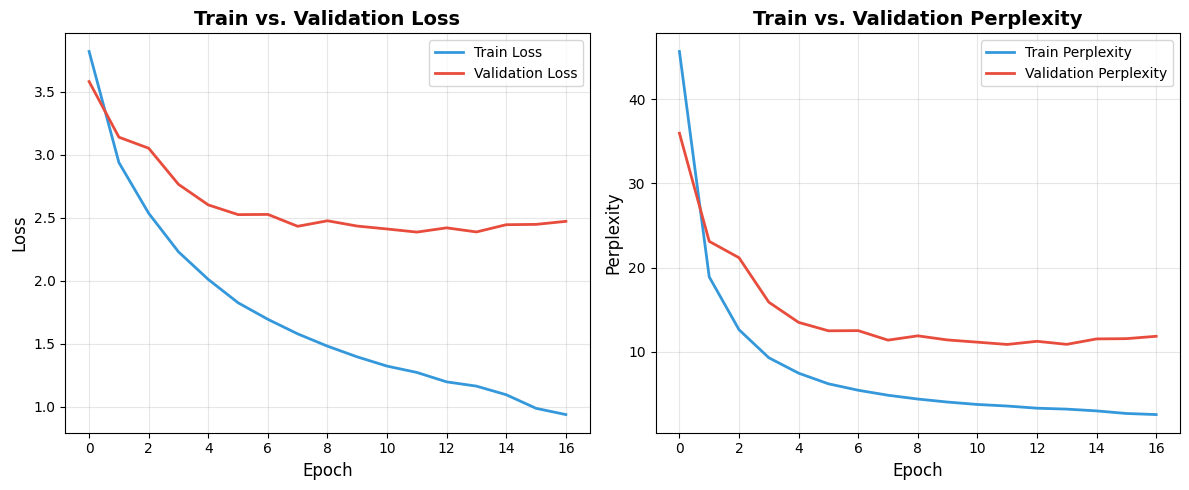


📋 TRAINING STATISTICS
Total Epochs Trained: 17
Best Validation Loss: 2.387
Best Validation Perplexity: 10.882
Final Train Loss: 0.938
Final Validation Loss: 2.473
Best Epoch: 12

✅ EVALUATION COMPLETE


In [ ]:
# ============================================================
# PLOT TRAINING CURVES
# ============================================================
print("\n" + "="*50)
print("📈 TRAINING CURVES")
print("="*50)

if 'train_losses' in globals() and 'valid_losses' in globals() and train_losses and valid_losses:
    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', linewidth=2, color='#3498db')
    plt.plot(valid_losses, label='Validation Loss', linewidth=2, color='#e74c3c')
    plt.title('Train vs. Validation Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Perplexity plot
    plt.subplot(1, 2, 2)
    train_ppl = [np.exp(loss) for loss in train_losses]
    valid_ppl = [np.exp(loss) for loss in valid_losses]
    plt.plot(train_ppl, label='Train Perplexity', linewidth=2, color='#3498db')
    plt.plot(valid_ppl, label='Validation Perplexity', linewidth=2, color='#e74c3c')
    plt.title('Train vs. Validation Perplexity', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Perplexity', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()

    # Save the figure
    plt.savefig('checkpoints/train_val_metrics.png', dpi=300, bbox_inches='tight')
    print("\n✅ Training curves saved to 'checkpoints/train_val_metrics.png'")
    plt.show()

    # Print final statistics
    print("\n" + "="*50)
    print("📋 TRAINING STATISTICS")
    print("="*50)
    print(f"Total Epochs Trained: {len(train_losses)}")
    print(f"Best Validation Loss: {min(valid_losses):.3f}")
    print(f"Best Validation Perplexity: {np.exp(min(valid_losses)):.3f}")
    print(f"Final Train Loss: {train_losses[-1]:.3f}")
    print(f"Final Validation Loss: {valid_losses[-1]:.3f}")
    print(f"Best Epoch: {valid_losses.index(min(valid_losses)) + 1}")
else:
    print("\n⚠️  No training history found. Please train the model first.")

print("\n" + "="*50)
print("✅ EVALUATION COMPLETE")
print("="*50)

In [ ]:
import torch

# ============================================================
# FUNCTION: Count total parameters
# ============================================================
def count_parameters(model):
    """Count total and trainable parameters in the model."""
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print("="*50)
    print("📊 MODEL PARAMETERS SUMMARY")
    print("="*50)
    print(f"Total Parameters:       {total_params:,}")
    print(f"Trainable Parameters:   {trainable_params:,}")
    print(f"Non-trainable Params:   {total_params - trainable_params:,}")
    print(f"\nModel Size (float32):   ~{total_params * 4 / (1024**2):.2f} MB")
    print(f"Model Size (float16):   ~{total_params * 2 / (1024**2):.2f} MB")
    print("="*50)

    return total_params, trainable_params

# ============================================================
# FUNCTION: Detailed parameter count by component
# ============================================================
def detailed_parameter_count(model):
    """Show parameter count for each major component (encoder, decoder, etc.)."""
    print("\n" + "="*50)
    print("📊 PARAMETER BREAKDOWN BY COMPONENT")
    print("="*50)

    for name, module in model.named_children():
        num_params = sum(p.numel() for p in module.parameters())
        trainable = sum(p.numel() for p in module.parameters() if p.requires_grad)
        print(f"{name:20s}: {num_params:>12,} ({trainable:>12,} trainable)")

    print("="*50)
    total = sum(p.numel() for p in model.parameters())
    trainable_total = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"{'TOTAL':20s}: {total:>12,} ({trainable_total:>12,} trainable)")
    print("="*50)

# ============================================================
# FUNCTION: All layers parameter count
# ============================================================
def all_layers_parameter_count(model, show_all=False):
    """Show parameter count for every single layer."""
    print("\n" + "="*70)
    print("📊 ALL LAYERS PARAMETER COUNT")
    print("="*70)
    print(f"{'Layer Name':<50s} {'Parameters':>15s}")
    print("-"*70)

    layer_params = []
    for name, param in model.named_parameters():
        layer_params.append((name, param.numel()))

    # Show first 10, last 10, or all
    if not show_all and len(layer_params) > 20:
        # Show first 10
        for name, num_params in layer_params[:10]:
            print(f"{name:<50s} {num_params:>15,}")
        print(f"{'...' :<50s} {'...':>15s}")
        # Show last 10
        for name, num_params in layer_params[-10:]:
            print(f"{name:<50s} {num_params:>15,}")
    else:
        # Show all
        for name, num_params in layer_params:
            print(f"{name:<50s} {num_params:>15,}")

    print("="*70)
    total = sum(p.numel() for p in model.parameters())
    print(f"{'TOTAL':<50s} {total:>15,}")
    print("="*70)

# ============================================================
# RUN ALL ANALYSES
# ============================================================

# 1. Summary
total_params, trainable_params = count_parameters(model)

# 2. Component breakdown
detailed_parameter_count(model)

# 3. All layers (top 10 and bottom 10 only by default)
all_layers_parameter_count(model, show_all=False)

# Optional: Uncomment to see ALL layers
# print("\n" + "🔍 To see ALL layers, run:")
# print("all_layers_parameter_count(model, show_all=True)")

# ============================================================
# COMPARISON WITH COMMON MODELS
# ============================================================
print("\n" + "="*50)
print("📊 SIZE COMPARISON")
print("="*50)

# Common model sizes for reference
comparisons = {
    "GPT-2 (small)": 117_000_000,
    "BERT-base": 110_000_000,
    "T5-small": 60_000_000,
    "DistilBERT": 66_000_000,
}

print(f"Your model:        {total_params:>12,} parameters")
print("\nFor reference:")
for model_name, params in comparisons.items():
    print(f"{model_name:20s} {params:>12,} parameters")

print("="*50)

📊 MODEL PARAMETERS SUMMARY
Total Parameters:       17,606,416
Trainable Parameters:   17,606,416
Non-trainable Params:   0

Model Size (float32):   ~67.16 MB
Model Size (float16):   ~33.58 MB

📊 PARAMETER BREAKDOWN BY COMPONENT
encoder             :    6,238,208 (   6,238,208 trainable)
decoder             :   11,368,208 (  11,368,208 trainable)
TOTAL               :   17,606,416 (  17,606,416 trainable)

📊 ALL LAYERS PARAMETER COUNT
Layer Name                                              Parameters
----------------------------------------------------------------------
encoder.embedding.weight                                 2,560,000
encoder.rnn.weight_ih_l0                                   524,288
encoder.rnn.weight_hh_l0                                 1,048,576
encoder.rnn.bias_ih_l0                                       2,048
encoder.rnn.bias_hh_l0                                       2,048
encoder.rnn.weight_ih_l1                                 1,048,576
encoder.rnn.weight_hh_